# 초심자를 위한 시각화

- 빅데이터 MarketC의 와인정보: "RT_WINE_INFO_202106.csv" 파일을 사용 (게시자: 레드테이블)

1. NumPy와 Pandas를 이용한 전처리 
2. Matplotlib을 이용한 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("RT_WINE_INFO_202106.csv", index_col='WINE_ID')

In [3]:
df.sample(20)

,WINE_NM,WINE_REGION_NM,WINE_CAT,WINE_PC
WINE_ID,,,,
28816,Bedrock Wine Company California Old Vine Zinfa...,Zinfandel from California,Red Wine,27.99
8625,Kokomo Wines Peters Vineyard Chardonnay 2015,"Chardonnay from Russian River, Sonoma County, ...",White Wine,32.99
662,Argyros Estate Atlantis Rose 2017,"Rosé from Santorini, Greece",Pink and Rosé,17.99
3729,Chateau Tessendey 2015,"Bordeaux Red Blends from Fronsac, Bordeaux, Fr...",Red Wine,18.00
5899,emBRAZEN Chardonnay 2016,Chardonnay from California,White Wine,16.00
10579,Nielson Santa Barbara Chardonnay 2015,"Chardonnay from Santa Barbara, Central Coast, ...",White Wine,18.00
29819,Columbia Crest H3 Cabernet Sauvignon 2017,"Cabernet Sauvignon from Horse Heaven Hills, Co...",Red Wine,14.99
1757,Bonny Doon Clos de Gilroy Grenache 2017,"Grenache from Monterey, Central Coast, California",Red Wine,20.00
9163,Lichen Moonglow Pinot Noir 2017,"Pinot Noir from Anderson Valley, Mendocino, Ca...",Red Wine,34.99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18558 entries, 1 to 31521
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WINE_NM         18558 non-null  object 
 1   WINE_REGION_NM  18558 non-null  object 
 2   WINE_CAT        18089 non-null  object 
 3   WINE_PC         18558 non-null  float64
dtypes: float64(1), object(3)
memory usage: 724.9+ KB


In [5]:
df[df['WINE_CAT'].isna() == True]

,WINE_NM,WINE_REGION_NM,WINE_CAT,WINE_PC
WINE_ID,,,,
360,Alvear Oloroso Asuncion (375ML),Sherry from Spain,NaN,27.00
361,Alvear Montilla Fino,Sherry from Spain,NaN,17.99
362,Alvear Amontillado (Medium Dry),Sherry from Spain,NaN,22.99
363,Alvear Pedro Ximenez de Anada (375ML) 2015,Sherry from Spain,NaN,26.99
364,Alvear Fino En Rama (500ML) 2012,Sherry from Spain,NaN,15.99
...,...,...,...,...
29734,Churchill's Vintage Port 2017,"Port from Douro, Portugal",NaN,109.99
29795,Cocchi Vermouth di Torino,Vermouth from Italy,NaN,19.99
29831,Conundrum Red and White Tasting Duo,Mixed Collections from California,NaN,36.99


### 와인 가격 분포 시각화
 - 어떤 그래프?
     - 미세한 분포를 가진 가격들의 막대 그래프를 그리기에는 적합하지 않을 것이라 판단
     - 가격 변화 추이가 아닌 가격의 분포를 확인하고 싶기 때문에 곡선 그래프도 적합하지 않을 것
     
 - Box와 Whisker를 통해 중앙값 등을 확인하기 용이한 Box Plot을 선정!

In [6]:
# 범위 설정을 위해 최대값 확인
df['WINE_PC'].max()

10000.0

Text(0, 0.5, 'PRICE')

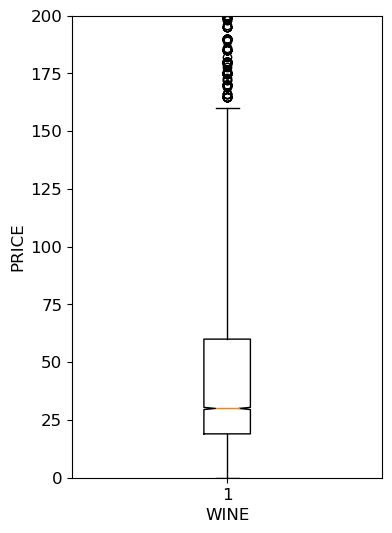

In [7]:
# 그래프 스케일 max 값을 10000으로 잡지 않고 200 정도로 잡아 모양을 보자!

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 6)
plt.rcParams['font.size'] = 12

price = df['WINE_PC']

fig, ax = plt.subplots()
box = ax.boxplot([price], notch=True, whis=2.5)
ax.set_ylim(0, 200)
ax.set_xlabel('WINE')
ax.set_ylabel('PRICE')

In [8]:
whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]

print('whiskers:', whiskers)  #수염 부분 값
print('medians:', medians)  #중앙값

whiskers: [array([18.99,  0.  ]), array([ 60., 160.])]
medians: [array([29.99, 29.99])]


### 와인 종류 별 분포
 - 데이터 안에 와인이 종류 별로 몇 개씩 들어가있는지 그 개수를 확인해보자!
 - 종류 별 개수의 차이를 확인해보기 위해 막대 그래프를 그려보자!

In [9]:
category = df['WINE_CAT'].unique().tolist()
category

['Red Wine',
 'White Wine',
 'Pink and Rosé',
 'Sparkling & Champagne',
 nan,
 'Green Wine',
 'Screw Cap',
 'Collectible',
 'Boutique',
 'Great Gift',
 'Sparkling Wine',
 'Rose Wine',
 'Sparkling Rose Wine']

In [10]:
# 리스트 속 nan값 제거
category = [x for x in category if not(pd.isnull(x)) == True]

In [11]:
category

['Red Wine',
 'White Wine',
 'Pink and Rosé',
 'Sparkling & Champagne',
 'Green Wine',
 'Screw Cap',
 'Collectible',
 'Boutique',
 'Great Gift',
 'Sparkling Wine',
 'Rose Wine',
 'Sparkling Rose Wine']

In [12]:
cat_num = df['WINE_CAT'].value_counts()
cat_num

Red Wine                 11480
White Wine                5019
Sparkling & Champagne      792
Pink and Rosé              521
Sparkling Wine              97
Collectible                 80
Rose Wine                   36
Green Wine                  24
Screw Cap                   22
Boutique                    16
Great Gift                   1
Sparkling Rose Wine          1
Name: WINE_CAT, dtype: int64

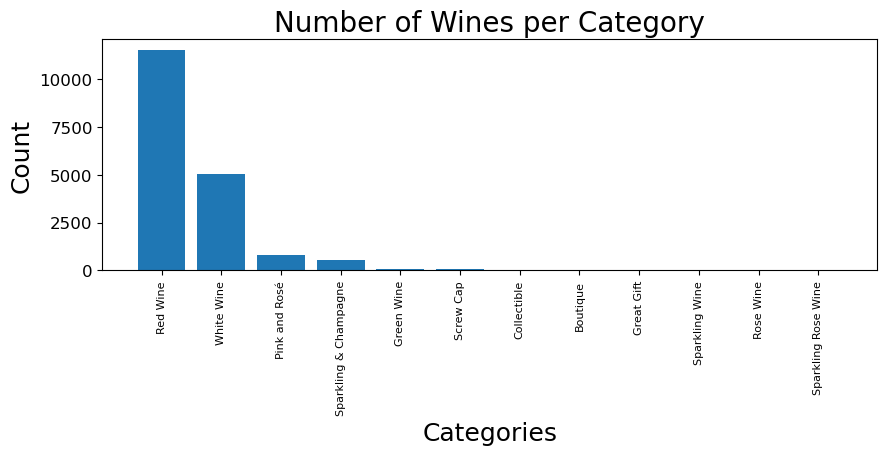

In [13]:
label = ['Red Wine',
 'White Wine',
 'Pink and Rosé',
 'Sparkling & Champagne',
 'Green Wine',
 'Screw Cap',
 'Collectible',
 'Boutique',
 'Great Gift',
 'Sparkling Wine',
 'Rose Wine',
 'Sparkling Rose Wine']
index = np.arange(len(label))

plt.figure(figsize=(10,3))
plt.bar(index, cat_num)
plt.title('Number of Wines per Category', fontsize=20)
plt.xlabel('Categories', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(index, label, fontsize=8, rotation=90)
plt.show()

### 와인 제조년도 별 분포도
 - pandas를 활용해 와인의 제조년도를 뽑아내고 제조년도 별로 몇 개씩 들어가있는지 그 개수를 확인해보자!


In [14]:
df['year'] = df['WINE_NM'].str.split(' ').str[-1]

In [15]:
df['year']

WINE_ID
1        2016
2        2016
3        2017
4        2016
5        2015
         ... 
31517    2013
31518    2018
31519    2019
31520    2019
31521    2013
Name: year, Length: 18558, dtype: object

In [16]:
df1 = df.copy()

In [17]:
df1['year'].replace(r"[\D]", np.nan, regex=True, inplace=True)

In [18]:
df1['year'].unique()

array(['2016', '2017', '2015', '2014', nan, '2018', '2013', '2007',
       '2004', '2010', '2012', '2000', '2005', '2009', '2003', '2002',
       '1999', '2006', '2001', '2011', '1998', '2008', '1995', '1997',
       '1991', '1', '1994', '1996', '1928', '1943', '1990', '1987',
       '1989', '1985', '1983', '67', '1986', '6', '4', '2', '8', '3',
       '2019', '2020', '1956', '1979', '1976', '1993', '1982', '1958'],
      dtype=object)

In [19]:
df1.dropna(inplace=True)

In [20]:
df1['year'].unique()

array(['2016', '2017', '2015', '2014', '2018', '2013', '2007', '2004',
       '2010', '2012', '2000', '2005', '2009', '2003', '2002', '1999',
       '2006', '2001', '2011', '1998', '2008', '1995', '1997', '1991',
       '1', '1994', '1996', '1928', '1943', '1990', '1987', '1989',
       '1985', '1983', '67', '1986', '6', '2019', '2020', '1956', '1979',
       '1976', '3', '1993', '1982', '1958'], dtype=object)

In [21]:
df1[~(df1['year'].astype('int32') > 1000)]

,WINE_NM,WINE_REGION_NM,WINE_CAT,WINE_PC,year
WINE_ID,,,,,
1717,Bonanza by Chuck Wagner California Cabernet Sa...,Cabernet Sauvignon from California,Red Wine,25.00,1
9762,Marietta Old Vine Red Lot 67,"Other Red Blends from Sonoma County, California",Red Wine,13.99,67
12017,Red Schooner by Caymus Voyage 6,Malbec from Argentina,Red Wine,49.99,6
28947,Bonanza by Chuck Wagner California Cabernet Sa...,Cabernet Sauvignon from California,Red Wine,23.99,3


In [22]:
# 연도가 이상한 행의 index 추출 후 list에 넣음
odd_idx = df1.index[~(df1['year'].astype('int32') > 1000)].tolist()
odd_idx

[1717, 9762, 12017, 28947]

In [23]:
df1.drop(labels=odd_idx, inplace=True)

In [24]:
year = df1['year'].unique().tolist()
year

['2016',
 '2017',
 '2015',
 '2014',
 '2018',
 '2013',
 '2007',
 '2004',
 '2010',
 '2012',
 '2000',
 '2005',
 '2009',
 '2003',
 '2002',
 '1999',
 '2006',
 '2001',
 '2011',
 '1998',
 '2008',
 '1995',
 '1997',
 '1991',
 '1994',
 '1996',
 '1928',
 '1943',
 '1990',
 '1987',
 '1989',
 '1985',
 '1983',
 '1986',
 '2019',
 '2020',
 '1956',
 '1979',
 '1976',
 '1993',
 '1982',
 '1958']

In [25]:
year_num = df1['year'].value_counts()
year_num

2016    4123
2015    3029
2017    3014
2014    2155
2013    1240
2018     900
2012     715
2019     550
2011     332
2010     224
2009     176
2020     107
2006      91
2008      90
2005      73
2007      68
2003      60
2004      55
2001      55
2000      54
2002      36
1999      28
1996      23
1998      21
1997      13
1995      12
1990      10
1994       8
1991       7
1989       4
1983       3
1987       2
1985       2
1993       2
1928       1
1943       1
1986       1
1956       1
1979       1
1976       1
1982       1
1958       1
Name: year, dtype: int64

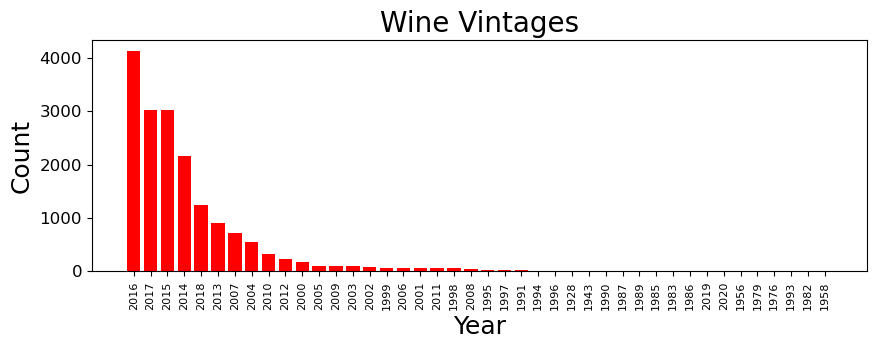

In [26]:
label = year
index = np.arange(len(label))

plt.figure(figsize=(10,3))
plt.bar(index, year_num, color='r')
plt.title('Wine Vintages', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(index, label, fontsize=8, rotation=90)
plt.show()

### 와인의 지역 별 분포도
 - 데이터 내의 와인들이 어떤 지역에 주로 분포되어 있는지 살펴보자!

In [27]:
df['region'] = df['WINE_REGION_NM'].str.split(' ').str[-1]

In [28]:
df['region']

WINE_ID
1        California
2        California
3           Zealand
4        Washington
5        Washington
            ...    
31517     Australia
31518     Argentina
31519        Greece
31520      Portugal
31521       Zealand
Name: region, Length: 18558, dtype: object

In [29]:
df2 = df.copy()

In [30]:
df2[df2['region'].str.contains("Zealand")].sample(20)

,WINE_NM,WINE_REGION_NM,WINE_CAT,WINE_PC,year,region
WINE_ID,,,,,,
8673,Kumeu River Coddington Chardonnay 2013,Chardonnay from New Zealand,White Wine,48.99,2013,Zealand
13441,Spy Valley Sauvignon Blanc 2017,"Sauvignon Blanc from Marlborough, New Zealand",White Wine,18.99,2017,Zealand
14749,Villa Maria Cellar Selection Sauvignon Blanc 2017,"Sauvignon Blanc from Marlborough, New Zealand",White Wine,18.99,2017,Zealand
9974,Maui Pinot Gris 2017,"Pinot Gris/Grigio from Marlborough, New Zealand",White Wine,14.99,2017,Zealand
13520,Starborough Sauvignon Blanc Marlborough 2017,"Sauvignon Blanc from Marlborough, New Zealand",White Wine,11.99,2017,Zealand
6245,Felton Road Central Otago Riesling 2016,"Riesling from Central Otago, New Zealand",White Wine,31.99,2016,Zealand
10417,Mt. Beautiful Pinot Gris 2015,"Pinot Gris/Grigio from Canterbury, New Zealand",White Wine,22.00,2015,Zealand
4234,Craggy Range Winery Kidnappers Vineyard Chardo...,"Chardonnay from Hawkes Bay, New Zealand",White Wine,20.99,2015,Zealand
14362,Trinity Hill Hawkes Bay Pinot Noir 2014,"Pinot Noir from Hawkes Bay, New Zealand",Red Wine,18.99,2014,Zealand


In [31]:
df2['region'] = df2['region'].str.replace("Zealand", "New Zealand")

In [32]:
df2['region'].unique()

array(['California', 'New Zealand', 'Washington', 'Australia', 'Oregon',
       'Italy', 'Spain', 'Germany', 'Argentina', 'Croatia', 'Chile',
       'France', 'Greece', 'Africa', 'Portugal', 'Austria', 'from',
       'Virginia', 'Israel', 'Uruguay', 'York', 'Other', 'England',
       'Lebanon', 'Mexico', 'U.S.', 'Canada', 'Japan', 'Turkey',
       'Hungary', 'Brazil', 'Slovenia', '(FYROM)', 'China', 'Veneto',
       'Adige', 'Giulia', 'Lombardy', 'Lazio', 'Piedmont', 'Marche',
       'Liguria', 'Sardinia', 'Sicily', "d'Aosta", 'Abruzzo', 'Campania',
       'Tuscany', 'Emilia-Romagna', 'Apulia', 'Calabria', 'Basilicata',
       'Umbria', 'Molise'], dtype=object)

In [33]:
df2[df2['region'].str.contains("York")]

,WINE_NM,WINE_REGION_NM,WINE_CAT,WINE_PC,year,region
WINE_ID,,,,,,
1886,Boundary Breaks No.239 Riesling 2016,"Riesling from Finger Lakes, New York",White Wine,18.99,2016,York
1887,Boundary Breaks No.239 Riesling 2017,"Riesling from Finger Lakes, New York",White Wine,23.00,2017,York
1888,Boundary Breaks Ovid Line North Riesling 2016,"Riesling from Finger Lakes, New York",White Wine,19.00,2016,York
1889,Boundary Breaks No.198 Reserve Riesling 2016,"Riesling from Finger Lakes, New York",White Wine,19.99,2016,York
5612,Dr. Konstantin Frank Rkatsiteli 2017,"Other White Wine from Finger Lakes, New York",White Wine,17.99,2017,York
5613,Dr. Konstantin Frank Gruner Veltliner 2017,"Gruner Veltliner from Finger Lakes, New York",White Wine,16.99,2017,York
5614,Dr. Konstantin Frank Gewurztraminer 2016,"Gewurztraminer from Finger Lakes, New York",White Wine,17.99,2016,York
6487,Forge Cellars Classique Pinot Noir 2016,"Pinot Noir from Finger Lakes, New York",Red Wine,29.99,2016,York
6488,Forge Cellars Les Alliés Riesling 2013,"Riesling from Finger Lakes, New York",White Wine,27.99,2013,York


In [34]:
df2['region'] = df2['region'].str.replace("York", "New York")

In [35]:
df2[df2['region'].str.contains("from")]

,WINE_NM,WINE_REGION_NM,WINE_CAT,WINE_PC,year,region
WINE_ID,,,,,,
894,Badia a Coltibuono Chianti Classico (375ML hal...,Sangiovese from,Red Wine,10.99,2016,from
9059,Le Grand Courtage Rose & Blanc de Blancs Brut,Mixed Collections from,NaN,50.00,Brut,from
9219,Llopart Reserva Cava Brut 2015,Vintage Sparkling Wine from,Sparkling & Champagne,31.99,2015,from
9772,Marjan Simcic Ribolla 2016,Other White Wine from,White Wine,18.99,2016,from
13853,Tenuta di Nozzole Villa Nozzole Chianti Classi...,Sangiovese from,Red Wine,19.99,2016,from
...,...,...,...,...,...,...
15555,Riedel Flamingo Decanter,In Box Glassware from,NaN,499.97,Decanter,from
15556,Riedel Veritas Pinot Noir / Burgundy Glasses –...,Stemware & Decanters from,NaN,59.97,2,from
15557,Riedel O Chardonnay Tumblers - Pay for 3 Get 4,Stemware & Decanters from,NaN,51.00,4,from


In [36]:
df2.drop(df2[df2['region'].str.endswith("from")].index, inplace = True)

In [37]:
df2['region'].unique()

array(['California', 'New Zealand', 'Washington', 'Australia', 'Oregon',
       'Italy', 'Spain', 'Germany', 'Argentina', 'Croatia', 'Chile',
       'France', 'Greece', 'Africa', 'Portugal', 'Austria', 'Virginia',
       'Israel', 'Uruguay', 'New York', 'Other', 'England', 'Lebanon',
       'Mexico', 'U.S.', 'Canada', 'Japan', 'Turkey', 'Hungary', 'Brazil',
       'Slovenia', '(FYROM)', 'China', 'Veneto', 'Adige', 'Giulia',
       'Lombardy', 'Lazio', 'Piedmont', 'Marche', 'Liguria', 'Sardinia',
       'Sicily', "d'Aosta", 'Abruzzo', 'Campania', 'Tuscany',
       'Emilia-Romagna', 'Apulia', 'Calabria', 'Basilicata', 'Umbria',
       'Molise'], dtype=object)

In [73]:
US = ['California', 'Washington', 'Oregon', 'New York', 'Virginia']
ITALY = ['Veneto', 'Adige', 'Giulia',
       'Lombardy', 'Lazio', 'Piedmont', 'Marche', 'Liguria', 'Sardinia',
       'Sicily', "d'Aosta", 'Abruzzo', 'Campania', 'Tuscany',
       'Emilia-Romagna', 'Apulia', 'Calabria', 'Basilicata', 'Umbria',
       'Molise']

- wine price랑 year 엮어서
- wine price랑 region 엮어서
- wine price, year, region 세개 다 합쳐서
- n년 후에 와인이 얼마가 될지